The objective of this project to use the neural networking MLP algorithm and improve the model performance by hyperparameter tuning using differnet mechanism. 

We used below technology stacks
1.Google colab
2. Tenserflow
3. Keras
4. Imbalancing handling using Class_weight and SMOTE
4. Keras tuner with HyperModel, RandomSearch, Hyperband, BayesianOptimization.

### Dataset description

Column Description

id Unique id for each row.

relationship_status The relationship status of the most responsive customers to the advertisement.

industry The industry to which the product belonged.

genre The type of advertisement.

targeted_sex Sex that was mainly targeted for the advertisement.

averageruntime(minutesper_week) Minutes per week the advertisement was aired.

airtime Time when the advertisement was aired.

airlocation Country of origin.

ratings Metric out of 1 which represents how much of the targeted demographic watched the advertisement.

expensive A general measure of how expensive the product or service is that the ad is discussing.

moneybackguarantee Whether or not the product offers a refund in the case of customer dissatisfaction.

netgain Whether the ad will incur a gain or not when sold.

[target]

Objective This dataset is intended for binary classification tasks. Use this data set to train a model able to classify whether an ad will be profitable or not.

### Import packages

In [5]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline



import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt


import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### onboard data set

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
csv1=pd.read_csv('/content/drive/My Drive/INSAID/DL_project/advertisement_success.csv') 
csv1.shape

(26048, 12)

In [8]:
csv1.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [4]:
csv1.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [ ]:
print(csv1.isnull().sum())

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64


In [ ]:
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 26048 non-null  int64  
 1   realtionship_status                26048 non-null  object 
 2   industry                           26048 non-null  object 
 3   genre                              26048 non-null  object 
 4   targeted_sex                       26048 non-null  object 
 5   average_runtime(minutes_per_week)  26048 non-null  int64  
 6   airtime                            26048 non-null  object 
 7   airlocation                        26048 non-null  object 
 8   ratings                            26048 non-null  float64
 9   expensive                          26048 non-null  object 
 10  money_back_guarantee               26048 non-null  object 
 11  netgain                            26048 non-null  boo

## Exploratory data analysis

In [ ]:
#!pip install pandas-profiling --upgrade
import pandas_profiling
profile = csv1.profile_report(title='advertisement_preprocessing')
profile.to_file(output_file="/content/drive/My Drive/INSAID/DL_project/advertisement_preprocessing.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

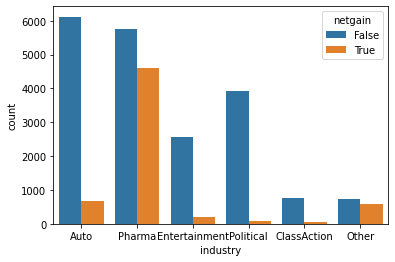

In [19]:
sns.countplot(x='industry', hue='netgain', data=csv1)

Pharma industry have higher netgain

ClassAction, Political, Entertainment low netgain

which genre increases netgain


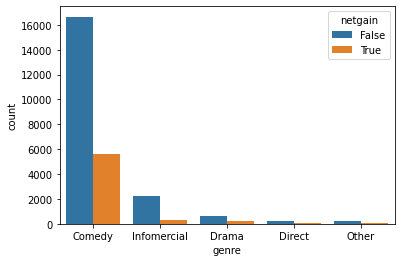

In [20]:
sns.countplot(x='genre', hue='netgain', data=csv1)

Most of the ads have genre as Comedy, so its obvious that the netgain will be higher for this genre

does average_runtime increases the netgain?

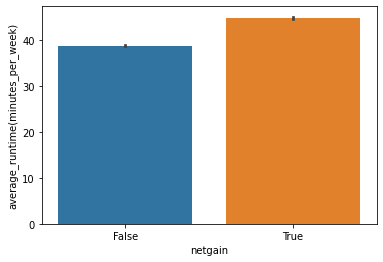

In [21]:
sns.barplot(x='netgain', y='average_runtime(minutes_per_week)', data=csv1)

little more increase advertisement timing can netgain

airtime affects netgain?


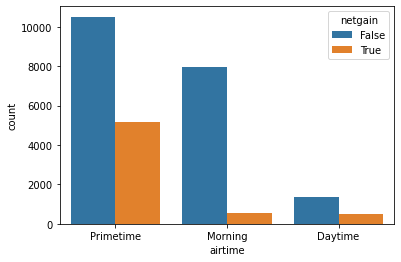

In [23]:
sns.countplot(x='airtime', hue='netgain', data=csv1)

As you can see the ads which are shown on primtime have more netgain

distribution of netgain across airlocation

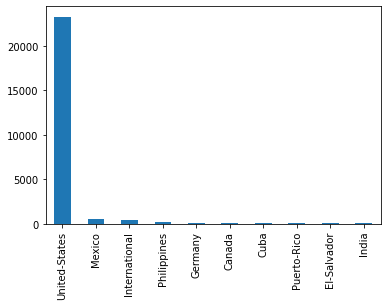

In [24]:
csv1['airlocation'].value_counts().nlargest(10).plot(kind='bar')

United States have higher no. ads shown (90%)

distribution of ads with expensive


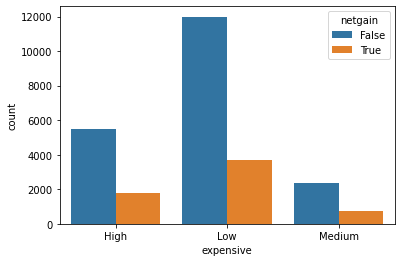

In [26]:
sns.countplot(x='expensive', hue='netgain', data=csv1)

the ads which are showing are showing low expense are the one where ppl are more attracted and profitable. (60 %)

In [27]:
csv1.groupby('netgain')['expensive'].value_counts(normalize=True).mul(100)

netgain  expensive
False    Low          60.398932
         High         27.698585
         Medium       11.902483
True     Low          59.757869
         High         28.732849
         Medium       11.509282
Name: expensive, dtype: float64

does money_back_guarantee affect netgain?

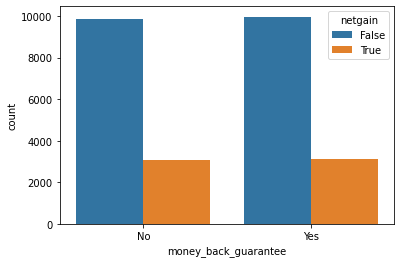

In [29]:
sns.countplot(x='money_back_guarantee', hue='netgain', data=csv1)

not that much of difference its making

 Correlation matrix of data

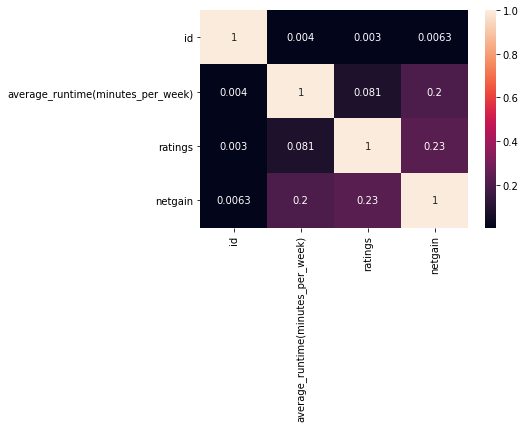

In [30]:
corr = csv1.corr()
sns.heatmap(corr, annot=True)

In [32]:
csv1.groupby('netgain')['ratings'].mean()

netgain
False    0.028984
True     0.069902
Name: ratings, dtype: float64

if the rating is higher netgain will be high

if the runtime is high then it may have high rating




Check distribution of data¶

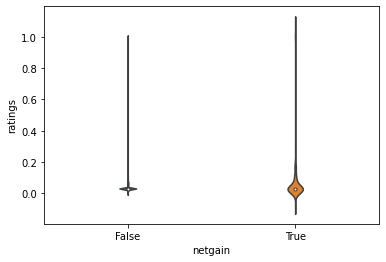

In [33]:
sns.violinplot(x='netgain', y='ratings',data=csv1, cut=5, width=0.1)

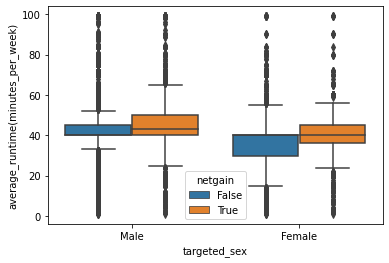

In [34]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='targeted_sex', hue='netgain', data=csv1)

males like more adds where the average time 40 minutes(average run time per week)

females like adds them in same range 38-42 minutes (average run time per week)

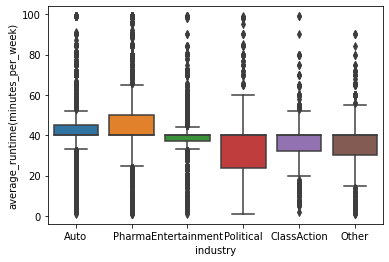

In [36]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='industry', data=csv1)

average running time per industry

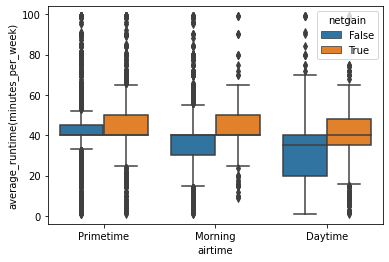

In [38]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='airtime', hue='netgain', data=csv1)

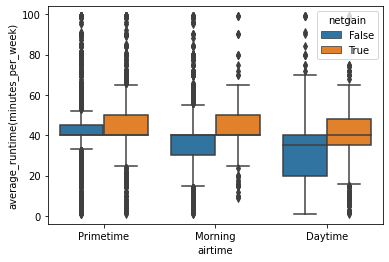

In [39]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='airtime', hue='netgain', data=csv1)

primetime shows have higher average runtime

the ads which got netgain have higher running time

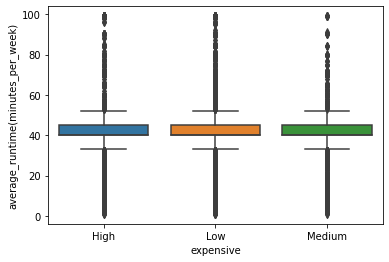

In [41]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='expensive', data=csv1)

all expense type of ads have same distribution of average runtime


### Encoading for Target Variable 

In [ ]:
# Encoding netgain to 0/1
csv1['netgain'] = csv1['netgain'].apply(lambda x: 1 if x else 0) 
csv1.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,0
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,0
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,0
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,0
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,1


### one hot encoading  for categorical column 

In [ ]:
data= pd.get_dummies(csv1, columns=['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee'], drop_first=True)

In [ ]:
data.head()

,id,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,19717,45,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,31593,45,0.027465,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,5681,45,0.027465,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,15491,40,0.027465,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,23587,48,0.027465,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.shape

(26048, 66)

### Normalization of input variables  and Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#droping ID (All unique value)and netgain(target value) from X(input)
X = data.drop(['id', 'netgain'], axis=1)
y = data['netgain']

# Before passing data to neural network it must be standardized
scaling = StandardScaler()
scaling.fit(X)
X = scaling.transform(X)
# Saling convert X in to numpy arry



In [ ]:
X


array([[ 0.37709809, -0.14832981, -0.40361994, ..., -0.36592642,
         1.00376939, -1.00376939],
       [ 0.37709809, -0.14832981, -0.40361994, ..., -0.36592642,
         1.00376939, -1.00376939],
       [ 0.37709809, -0.14832981,  2.47757827, ..., -0.36592642,
        -0.99624477,  0.99624477],
       ...,
       [-1.22556648,  0.83741885, -0.40361994, ..., -0.36592642,
         1.00376939, -1.00376939],
       [ 0.61749777, -0.14832981, -0.40361994, ..., -0.36592642,
        -0.99624477,  0.99624477],
       [-0.02356805, -0.14832981, -0.40361994, ..., -0.36592642,
        -0.99624477,  0.99624477]])

In [ ]:
y
# Y is still dataframe 

0        0
1        0
2        0
3        0
4        1
        ..
26043    1
26044    0
26045    1
26046    0
26047    0
Name: netgain, Length: 26048, dtype: int64

In [ ]:
#Startify since we have imbalanced dataset 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, np.array(y), random_state=42, stratify=np.array(y))
# here np.array(y) is used to convert dataframe to array as X is also array
num_input_nodes = X_train_full.shape[1]

### Identify class Imbalancing in Target Variable 

In [ ]:
data['netgain'].value_counts()

0    19853
1     6195
Name: netgain, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


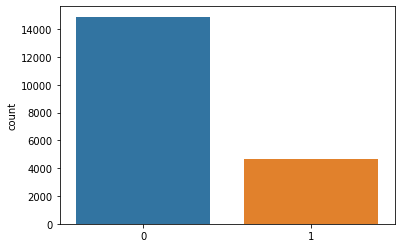

In [ ]:
g = sns.countplot(y_train_full)
n=[]


In [ ]:
y_train_full.shape



(19536,)

In [ ]:
X_train_full.shape

(19536, 64)

In [ ]:
y_test.shape


(6512,)

### Planning for Binary classification using MLP

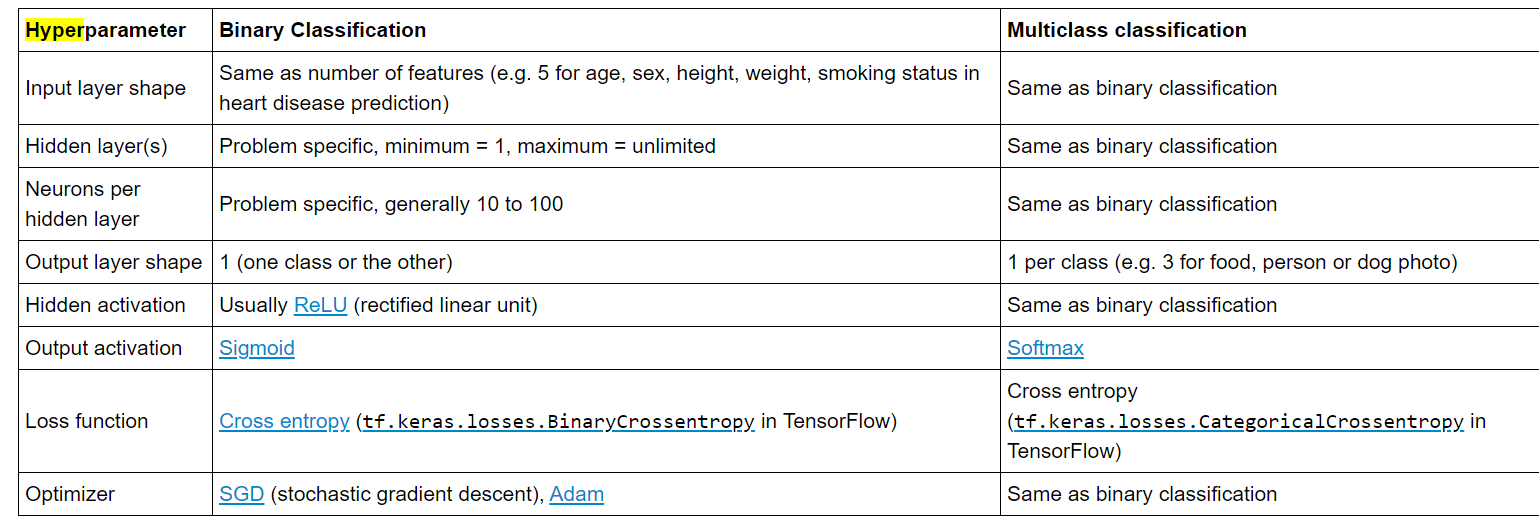

### Model 1 using simple layer architecture

In [ ]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=(X_train_full.shape[1],)))
model1.add(keras.layers.Dense(30, activation="relu"))
model1.add(keras.layers.Dropout(rate=0.5))
model1.add(keras.layers.Dense(20, activation="relu")) # hidden layer with Relu as activation
model1.add(keras.layers.Dropout(rate=0.3))
model1.add(keras.layers.Dense(1, activation="sigmoid"))  #output shape is 1, sigmoid is activation function in output layer





In [ ]:
model1.summary()
model1.layers
model1.layers[1].name

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1950      
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 2,591
Trainable params: 2,591
Non-trainable params: 0
____________________________________________________

'dense_9'

In [ ]:
weights, biases = model1.layers[1].get_weights()
print(weights)
print(biases)

[[ 0.1794874  -0.19427267 -0.08163373 ... -0.24160936  0.21964154
  -0.1697512 ]
 [-0.02184293  0.11534369  0.16750592 ... -0.0306288  -0.20949608
   0.04198775]
 [ 0.15365496  0.24099359 -0.10057601 ... -0.15560949 -0.13363332
   0.07565308]
 ...
 [-0.02043793  0.07263979 -0.23237601 ... -0.00346239  0.04713973
  -0.01221971]
 [ 0.11568984 -0.12789379  0.22476116 ...  0.11600837  0.02244508
  -0.22165628]
 [-0.01479165  0.20104975 -0.18778488 ... -0.04637228  0.17701256
   0.1414833 ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model1.compile(loss="BinaryCrossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.01) ,metrics=METRICS) #optimizer is Adam as more better SGD and Also work on sparse data set. loss is binarycrossentropy

In [ ]:

history0 = model1.fit(X_train_full, y_train_full, epochs=17, validation_split=0.3) # without class weight


Epoch 1/17
428/428 [==============================] - 5s 9ms/step - loss: 0.4084 - tp: 1061.0000 - fp: 618.0000 - tn: 9792.0000 - fn: 2204.0000 - accuracy: 0.7936 - precision: 0.6319 - recall: 0.3250 - auc: 0.8333 - prc: 0.6228 - val_loss: 0.4197 - val_tp: 258.0000 - val_fp: 20.0000 - val_tn: 4460.0000 - val_fn: 1123.0000 - val_accuracy: 0.8050 - val_precision: 0.9281 - val_recall: 0.1868 - val_auc: 0.8480 - val_prc: 0.6381
Epoch 2/17
428/428 [==============================] - 4s 9ms/step - loss: 0.3983 - tp: 954.0000 - fp: 443.0000 - tn: 9967.0000 - fn: 2311.0000 - accuracy: 0.7986 - precision: 0.6829 - recall: 0.2922 - auc: 0.8397 - prc: 0.6322 - val_loss: 0.4068 - val_tp: 255.0000 - val_fp: 20.0000 - val_tn: 4460.0000 - val_fn: 1126.0000 - val_accuracy: 0.8045 - val_precision: 0.9273 - val_recall: 0.1846 - val_auc: 0.8537 - val_prc: 0.6536
Epoch 3/17
428/428 [==============================] - 4s 8ms/step - loss: 0.4006 - tp: 906.0000 - fp: 443.0000 - tn: 9967.0000 - fn: 2359.0000 - 

## Model 1 performance

In [ ]:
crossentropty_test0 = model1.evaluate(X_test, y_test)[1]

204/204 [==============================] - 1s 5ms/step - loss: 0.3994 - tp: 301.0000 - fp: 21.0000 - tn: 4942.0000 - fn: 1248.0000 - accuracy: 0.8051 - precision: 0.9348 - recall: 0.1943 - auc: 0.8467 - prc: 0.6457


## Model1 performance and different metrics plots

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

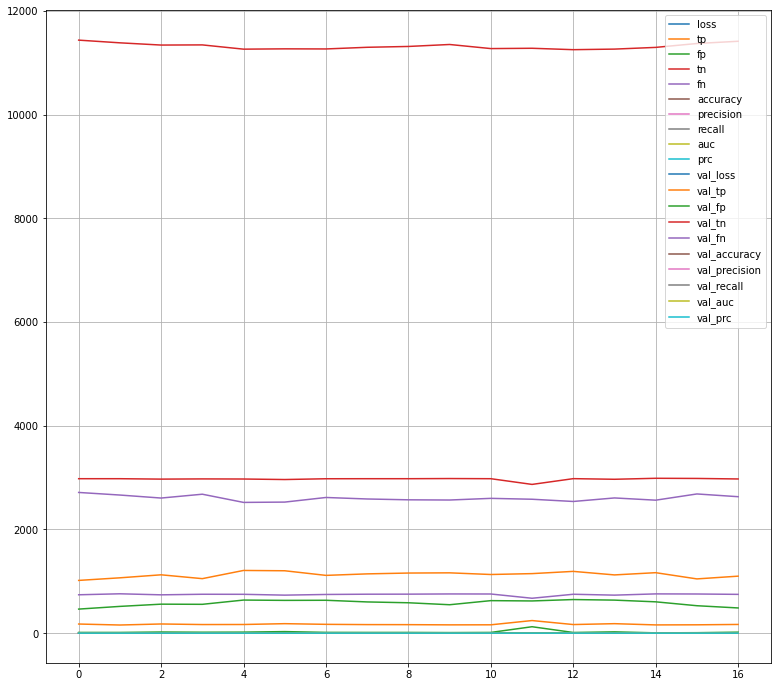

In [ ]:
pd.DataFrame(history0.history).plot(figsize=(13, 12))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
y_preds = model1.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[4942,   21],
       [1248,  301]])

## Model 2: Handle imbalance data with Class_weight to improve the performance. 

In [ ]:
#Handle imbalance data with class_weight
neg, pos = np.bincount(y_train_full)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0
class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Examples:
    Total: 19536
    Positive: 4646 (23.78% of total)

Weight for class 0: 0.66
Weight for class 1: 2.10


In [ ]:
print(neg)

14890


In [ ]:
model1.compile(loss="BinaryCrossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.01) ,metrics=METRICS) #optimizer is Adam as more better SGD and Also work on sparse data set. loss is binarycrossentropy

In [ ]:
#X_train_full, X_test, y_train_full, y_test
#history = model.fit(X_train_full, y_train_full, epochs=30, validation_data=(x_valid, y_valid), class_weight={0:, 1: .5})
history1 = model1.fit(X_train_full, y_train_full, epochs=20, validation_split=0.3, class_weight={0: 0.66, 1: 2.10}) # adding class weight



Epoch 1/20
428/428 [==============================] - 4s 9ms/step - loss: 0.5001 - tp: 2395.0000 - fp: 2278.0000 - tn: 8132.0000 - fn: 870.0000 - accuracy: 0.7698 - precision: 0.5125 - recall: 0.7335 - auc: 0.8343 - prc: 0.6315 - val_loss: 0.5252 - val_tp: 1004.0000 - val_fp: 847.0000 - val_tn: 3633.0000 - val_fn: 377.0000 - val_accuracy: 0.7912 - val_precision: 0.5424 - val_recall: 0.7270 - val_auc: 0.8527 - val_prc: 0.6514
Epoch 2/20
428/428 [==============================] - 4s 8ms/step - loss: 0.4960 - tp: 2482.0000 - fp: 2379.0000 - tn: 8031.0000 - fn: 783.0000 - accuracy: 0.7688 - precision: 0.5106 - recall: 0.7602 - auc: 0.8400 - prc: 0.6327 - val_loss: 0.4441 - val_tp: 1034.0000 - val_fp: 936.0000 - val_tn: 3544.0000 - val_fn: 347.0000 - val_accuracy: 0.7811 - val_precision: 0.5249 - val_recall: 0.7487 - val_auc: 0.8539 - val_prc: 0.6516
Epoch 3/20
428/428 [==============================] - 4s 8ms/step - loss: 0.4923 - tp: 2510.0000 - fp: 2472.0000 - tn: 7938.0000 - fn: 755.000

#### Model 2: Performance 

In [ ]:

crossentropty_test1 = model1.evaluate(X_test, y_test)[1]

204/204 [==============================] - 1s 5ms/step - loss: 0.4455 - tp: 1115.0000 - fp: 996.0000 - tn: 3967.0000 - fn: 434.0000 - accuracy: 0.7804 - precision: 0.5282 - recall: 0.7198 - auc: 0.8479 - prc: 0.6482


In [ ]:
y_preds = model1.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[3967,  996],
       [ 434, 1115]])

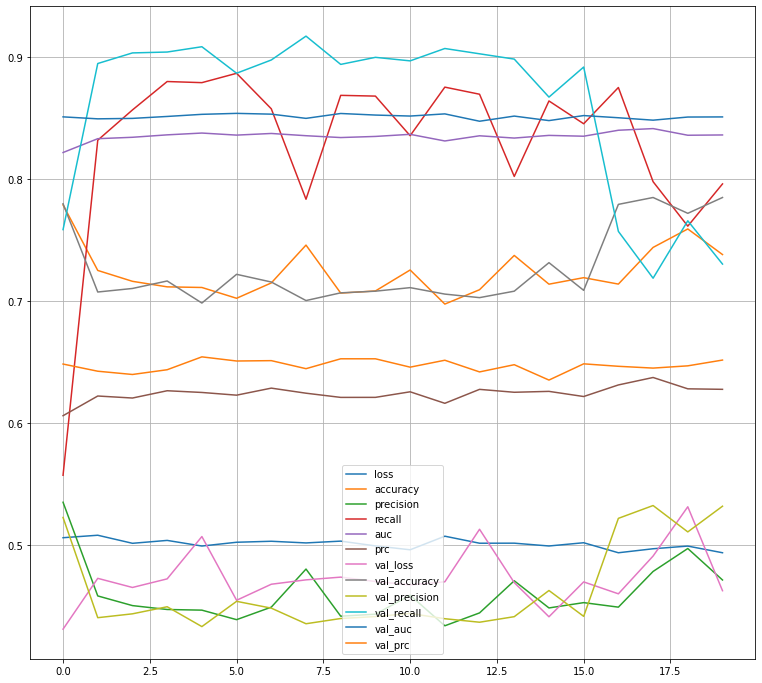

In [ ]:
pd.DataFrame(history1.history).plot(figsize=(13, 12))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### Compare results of simple layerd model1 with Model2 using Class_weight.
Crossenropy_test0 loss: 0.3994 - tp: 301.0000 - fp: 21.0000 - tn: 4942.0000 - fn: 1248.0000 - accuracy: 0.8051 - precision: 0.9348 - recall: 0.1943 - auc: 0.8467 - prc: 0.6457

crossentropty_test1 loss: loss: 0.4455 - tp: 1115.0000 - fp: 996.0000 - tn: 3967.0000 - fn: 434.0000 - accuracy: 0.7804 - precision: 0.5282 - recall: 0.7198 - auc: 0.8479 - prc: 0.6482

Here we can see, With class_weight Recall increase from .1995 to .7192 and precision is reduced, hence we can say with calss_weight we are not increasing the formance.

Hence we need to go for other solution to handle the imblance and improve the model performance.

##  Model3: Use smote for oversampling

In [ ]:
### Use smote for oversampling

In [ ]:
X_train_full.shape

(19536, 64)

In [ ]:
y_train_full.shape

(19536,)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE() 

In [ ]:
counter = Counter(y_train_full)

In [ ]:
print("before counter", counter)

before counter Counter({0: 14890, 1: 4646})


In [ ]:
# oversampling the dataset using counter
X_train_sm, y_train_sm= smt.fit_resample(X_train_full, y_train_full)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counter= Counter(y_train_sm)

In [ ]:
print("After counter", counter )

After counter Counter({1: 14890, 0: 14890})


In [ ]:
X_train_sm.shape

(29780, 64)

In [ ]:
y_train_sm.shape

(29780,)

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model1.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[1402, 3561],
       [ 587,  962]])

### Create model with SMOTE data

In [ ]:

model_smt = keras.models.Sequential()
model_smt.add(keras.layers.Flatten(input_shape=(X_train_sm.shape[1],)))
model_smt.add(keras.layers.Dense(30, activation="relu"))
model_smt.add(keras.layers.Dropout(rate=0.5))
model_smt.add(keras.layers.Dense(20, activation="relu")) # hidden layer with Relu as activation
model_smt.add(keras.layers.Dropout(rate=0.3))
model_smt.add(keras.layers.Dense(1, activation="sigmoid"))  #output shape is 1, sigmoid is activation function in output layer


model_smt.summary()
model_smt.layers
model_smt.layers[1].name

weights, biases = model_smt.layers[1].get_weights()
print(weights)
print(biases)

model_smt.compile(loss="BinaryCrossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.01) ,metrics=METRICS) #optimizer is Adam as more better SGD and Also work on sparse data set. loss is binarycrossentropy


history0 = model_smt.fit(X_train_sm, y_train_sm, epochs=17, validation_split=0.3) # without class weight


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1950      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 2,591
Trainable params: 2,591
Non-trainable params: 0
____________________________________________________

In [ ]:
crossentropty_test_smt = model_smt.evaluate(X_test, y_test)[1]



204/204 [==============================] - 0s 2ms/step - loss: 0.3979 - tp: 1211.0000 - fp: 1185.0000 - tn: 3778.0000 - fn: 338.0000 - accuracy: 0.7661 - precision: 0.5054 - recall: 0.7818 - auc: 0.8460 - prc: 0.6473


Compare last 3 model results 

Crossenropy_test0  loss: 0.3994 - tp: 301.0000 - fp: 21.0000 - tn: 4942.0000 - fn: 1248.0000 - accuracy: 0.8051 - precision: 0.9348 - recall: 0.1943 - auc: 0.8467 - prc: 0.6457

array([[3967,  996],
       [ 434, 1115]])

crossentropty_test1 loss: loss: 0.4455 - tp: 1115.0000 - fp: 996.0000 - tn: 3967.0000 - fn: 434.0000 - accuracy: 0.7804 - precision: 0.5282 - recall: 0.7198 - auc: 0.8479 - prc: 0.6482

array([[3956, 1007],
       [ 435, 1114]])

Crossentropy_test_smt   loss: 0.3979 - tp: 1211.0000 - fp: 1185.0000 - tn: 3778.0000 - fn: 338.0000 - accuracy: 0.7661 - precision: 0.5054 - recall: 0.7818 - auc: 0.8460 - prc: 0.6473

array([[4463,  500],
       [ 773,  776]])

Conslusion:  As we know Target "Netgain is imbalance" and we need to handle it. Such good performance as of now but we have better performance using SMOTE with respect to Class_weight.  going forward we need to see Auto hyperparameter section with SMOTE data set to evalute the performance

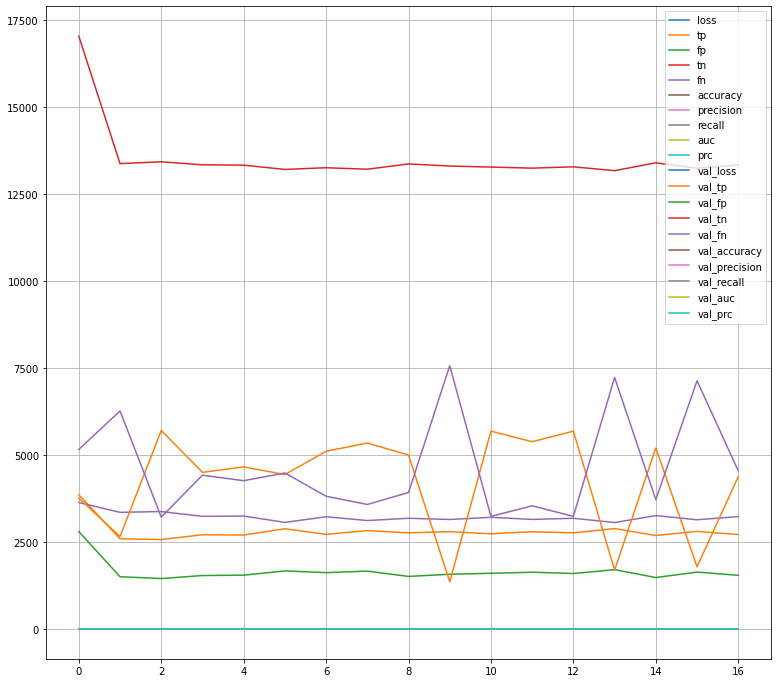

In [ ]:
pd.DataFrame(history0.history).plot(figsize=(13, 12))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
y_preds = model_smt.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[4463,  500],
       [ 773,  776]])

### Fine-Tuning Neural Network Hyperparameters on SMOTE samples

In [ ]:
num_input_nodes

64

In [ ]:
def build_model(n_hidden=3, n_neurons=30, learning_rate=3e-3, input_shape=num_input_nodes):
  model2 = keras.models.Sequential()
  model2.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model2.add(keras.layers.Dense(n_neurons, activation="relu"))
    
  model2.add(keras.layers.Dense(1,"sigmoid"))
  optimizer = keras.optimizers.Adam(lr=learning_rate)
  model2.compile(loss="binary_crossentropy",metrics=METRICS, optimizer=optimizer)
  return model2


In [ ]:
##The KerasRegressor object is a thin wrapper around the Keras model built using
build_model(). Since we did not specify any hyperparameter when creating it, it will
just use the default hyperparameters we defined in build_model(). Now we can use
this object like a regular Scikit-Learn regressor: we can train it using its fit()
method, then evaluate it using its score() method, and use it to make predictions
using its predict() method. Note that any extra parameter you pass to the fit()
method will simply get passed to the underlying Keras model. Also note that the
score will be the opposite of the MSE because Scikit-Learn wants scores, not losses
(i.e., higher should be better).

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
#keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
keras_reg_history= keras_reg.fit(X_train_sm, y_train_sm, epochs=100, validation_split=0.3 ,callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),keras.callbacks.ModelCheckpoint("my_model.h5",save_best_only=True)])
crossentropty_test = keras_reg.score(X_test, y_test)
#y_pred = keras_reg.predict(X_new)
#validation_split=0.2

Epoch 1/100
652/652 [==============================] - 5s 5ms/step - loss: 0.4718 - tp: 2897.7703 - fp: 2300.8132 - tn: 10111.1838 - fn: 1666.1286 - accuracy: 0.7652 - precision: 0.5510 - recall: 0.6459 - auc: 0.8297 - prc: 0.6363 - val_loss: 0.7894 - val_tp: 4062.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 4872.0000 - val_accuracy: 0.4547 - val_precision: 1.0000 - val_recall: 0.4547 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4077 - tp: 1637.6478 - fp: 897.3384 - tn: 6575.5942 - fn: 1353.3155 - accuracy: 0.7858 - precision: 0.6489 - recall: 0.5421 - auc: 0.8557 - prc: 0.6960 - val_loss: 0.7043 - val_tp: 6435.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 2499.0000 - val_accuracy: 0.7203 - val_precision: 1.0000 - val_recall: 0.7203 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 3/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4066 - tp: 1707.4778 - fp: 964.0965 - tn: 651

In [ ]:
#crossentropty_test2 = keras_reg.evaluate(X_test, y_test)
crossentropty_test2 = keras_reg.score(X_test, y_test)

#you can see new model have improved loss .3886, with model1 it was high 0.3783 

204/204 [==============================] - 0s 2ms/step - loss: 0.3929 - tp: 1117.0000 - fp: 954.0000 - tn: 4009.0000 - fn: 432.0000 - accuracy: 0.7872 - precision: 0.5394 - recall: 0.7211 - auc: 0.8563 - prc: 0.6657


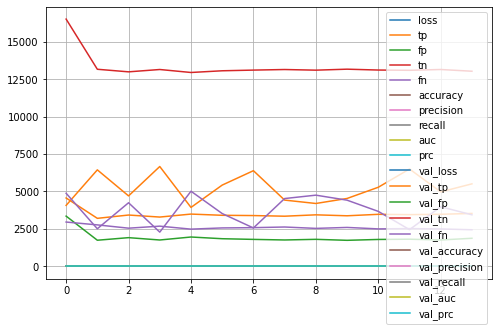

In [ ]:
pd.DataFrame(keras_reg_history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = keras_reg.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[4009,  954],
       [ 432, 1117]])

### Fine tune SMOTE based models for hidden layers, neurones and learning rate using RandomizedSearchCV

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 30).tolist(),
 "learning_rate": np.arange(3e-4, 3e-2).tolist(),

}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=15, cv=3)
rnd_search_cv.fit(X_train_sm, y_train_sm, epochs=30,validation_split=0.3, callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),keras.callbacks.ModelCheckpoint("my_model.h5",save_best_only=True)])
#Here we used Callbacks "earlystopping to save best parameters" and modelcheckpoint to save best model in h5.

Epoch 1/30
435/435 [==============================] - 4s 5ms/step - loss: 0.6478 - tp: 3430.9541 - fp: 2129.2362 - tn: 6516.0252 - fn: 1427.6055 - accuracy: 0.7387 - precision: 0.6046 - recall: 0.7014 - auc: 0.7976 - prc: 0.6319 - val_loss: 0.6049 - val_tp: 4746.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 1210.0000 - val_accuracy: 0.7968 - val_precision: 1.0000 - val_recall: 0.7968 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/30
435/435 [==============================] - 1s 3ms/step - loss: 0.5090 - tp: 2781.1284 - fp: 1101.5734 - tn: 2544.8349 - fn: 564.2844 - accuracy: 0.7631 - precision: 0.7204 - recall: 0.8329 - auc: 0.8197 - prc: 0.7584 - val_loss: 0.5318 - val_tp: 4937.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 1019.0000 - val_accuracy: 0.8289 - val_precision: 1.0000 - val_recall: 0.8289 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 3/30
435/435 [==============================] - 1s 3ms/step - loss: 0.4956 - tp: 2772.9335 - fp: 1086.3716 - tn: 2597.5

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = rnd_search_cv.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[4039,  924],
       [ 457, 1092]])

In [ ]:
rnd_search_cv.best_params_ # best parameters

AttributeError: ignored

In [ ]:
rnd_search_cv.best_score_ # best score

-0.5853206713994344

In [ ]:
rnd_search_history=rnd_search_cv.best_estimator_.model #Trained keras model

In [ ]:
rnd_search_history.summary()

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 27)                1755      
_________________________________________________________________
dense_232 (Dense)            (None, 27)                756       
_________________________________________________________________
dense_233 (Dense)            (None, 27)                756       
_________________________________________________________________
dense_234 (Dense)            (None, 1)                 28        
Total params: 3,295
Trainable params: 3,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnd_search_history.save("my_best_model.h5") # save model

In [ ]:
model_production = keras.models.load_model("my_best_model.h5")

In [ ]:
crossentropty_test_rnd = model_production.evaluate(X_test, y_test)[1]


204/204 [==============================] - 1s 5ms/step - loss: 0.3894 - tp: 1092.0000 - fp: 924.0000 - tn: 4039.0000 - fn: 457.0000 - accuracy: 0.7879 - precision: 0.5417 - recall: 0.7050 - auc: 0.8540 - prc: 0.6608


In [ ]:

y_preds = model_production.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[4039,  924],
       [ 457, 1092]])

y_preds = rnd_search_cv.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

In [ ]:
y_test[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
#Using model to make prediction 
X_new=X_test[:10]
y_proba=model_production.predict(X_new)
y_proba
tf.round(y_proba)[:10]
#y_pred = model.predict_classes(X_new)
#y_pred=model.predict(X_new>0.5).astype("int32")
#y_pred=np.argmax(model.predict(X_new), axis=-1)
#test -- y_pred = model.predict_classes(X_new)
#y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

Compare last 4 model results 

Crossenropy_test0  loss: 0.3994 - tp: 301.0000 - fp: 21.0000 - tn: 4942.0000 - fn: 1248.0000 - accuracy: 0.8051 - precision: 0.9348 - recall: 0.1943 - auc: 0.8467 - prc: 0.6457

array([[3967,  996],
       [ 434, 1115]])

crossentropty_test1 loss: loss: 0.4455 - tp: 1115.0000 - fp: 996.0000 - tn: 3967.0000 - fn: 434.0000 - accuracy: 0.7804 - precision: 0.5282 - recall: 0.7198 - auc: 0.8479 - prc: 0.6482

array([[3956, 1007],
       [ 435, 1114]])

Crossentropy_test_smt  loss: 0.4074 - tp: 776.0000 - fp: 500.0000 - tn: 4463.0000 - fn: 773.0000 - accuracy: 0.8045 - precision: 0.6082 - recall: 0.5010 - auc: 0.8479 - prc: 0.6443

array([[4463,  500],
       [ 773,  776]])

Crossentropy_test_rnd loss: 0.3894 - tp: 1092.0000 - fp: 924.0000 - tn: 4039.0000 - fn: 457.0000 - accuracy: 0.7879 - precision: 0.5417 - recall: 0.7050 - auc: 0.8540 - prc: 0.6608

array([[4039,  924],
       [ 457, 1092]])

Conslusion:  As we know Target "Netgain is imbalance" and we need to handle it. Such good performance as of now but we have better performance using SMOTE with respect to Class_weight.  going forward we need to see Auto hyperparameter section with SMOTE data set to evalute the performance

## Keras tuner with  HyperModel, RandomSearch, Hyperband, BayesianOptimization

In [ ]:
pip install keras-tuner

In [ ]:
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization

In [ ]:
class ClassificationHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape,
                kernel_initializer='he_normal', bias_initializer='zeros'
            )
        )
  

        model.add(
            layers.Dense(
                units=hp.Int('units', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                kernel_initializer='he_normal', bias_initializer='zeros'
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(layers.Dense(1, kernel_initializer='he_normal', bias_initializer='zeros'))
        
        model.compile(
            optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'],
        )
        
        return model

In [ ]:
input_shape = (X_train_sm.shape[1],)
input_shape

(64,)

In [ ]:
#rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=15, cv=3)
#rnd_search_cv.fit(X_train_full, y_train_full, epochs=100,validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),keras.callbacks.ModelCheckpoint("my_model.h5",save_best_only=True)])

In [ ]:
#initialize hypermodel
input_shape = (X_train_sm.shape[1],)
hypermodel = ClassificationHyperModel(input_shape)

### Random Search Tune

In [ ]:
#Build Random Search Tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
tuner_rs = RandomSearch(
            hypermodel,
            #objective=('precision'),
            objective='accuracy',
            #metrics=[f1_score],
            seed=42,
            max_trials=10,
            executions_per_trial=2, overwrite=True
        )

In [ ]:
y_train_sm.shape

(29780,)

In [1]:
tuner_rs.search(X_train_sm, y_train_sm, epochs=10, validation_split=0.3, verbose=0)

NameError: ignored

In [ ]:
#Evaluate Random Search
best_model_hpermodel_rs = tuner_rs.get_best_models(num_models=1)[0]


In [ ]:
accuracy_rs = best_model_hpermodel_rs.evaluate(X_test, y_test)[1]

204/204 [==============================] - 0s 954us/step - loss: 0.4121 - accuracy: 0.8055


In [ ]:
print('Random search a: ', accuracy_rs)

Random search a:  0.8091216087341309


In [ ]:
y_preds_hpermodel = best_model_hpermodel_rs.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[4009,  954],
       [ 432, 1117]])

In [ ]:
#Build, Run and Evaluate Hyperband Tuner¶

### Build, Run and Evaluate Hyperband Tuner¶

In [ ]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=30,
            objective='accuracy',
            seed=42,
            executions_per_trial=2,
            directory='hb_1'
        )

tuner_hb.search(X_train_sm, y_train_sm, epochs=10, validation_split=0.3, verbose=0)


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model_Hyperband = tuner_hb.get_best_models(num_models=1)[0]


In [ ]:
accuracy_hb = best_model_Hyperband.evaluate(X_test, y_test)[1]

204/204 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8028


In [ ]:
print('accuracy hb: ', accuracy_hb)

accuracy hb:  0.8020577430725098


In [ ]:
y_preds_hyperband = best_model_Hyperband.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds_hyperband))

array([[4295,  668],
       [ 621,  928]])

### Build, Run and Evaluate Bayesian Optimization Tuner

In [ ]:
#Build, Run and Evaluate Bayesian Optimization Tuner
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='b1'
        )

tuner_bo.search(X_train_sm, y_train_sm, epochs=10, validation_split=0.3, verbose=0)

best_model_Bayesian_rs = tuner_bo.get_best_models(num_models=1)[0]
accuracy_bo = best_model.evaluate(X_test, y_test)[1]

INFO:tensorflow:Reloading Oracle from existing project b1/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from b1/untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
204/204 [==============================] - 0s 965us/step - loss: 0.4161 - accuracy: 0.8091


In [ ]:
print('Bayesian Optimization accuracy: ', accuracy_bo)

Bayesian Optimization accuracy:  0.8091216087341309


In [ ]:
y_preds_Bayesian = best_model_Bayesian_rs.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds_Bayesian))

array([[4404,  559],
       [ 708,  841]])

## We got best results with BayesianOptimization accuracy:  0.8071253299713135


In [ ]:
X_new=X_test[:10]
y_proba=best_model_Bayesian_rs.predict(X_new)
y_proba


array([[ 0.62201273],
       [-0.02552989],
       [-0.09229225],
       [ 0.28262943],
       [ 0.51524925],
       [ 0.00220351],
       [-0.06445104],
       [-0.09760781],
       [ 0.48611447],
       [ 0.5173091 ]], dtype=float32)

In [ ]:
tf.round(y_proba)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 1.],
       [-0.],
       [-0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 1.]], dtype=float32)>

In [ ]:
y_test[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = best_model_Bayesian_rs.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[4404,  559],
       [ 708,  841]])

## Confusion Matrix

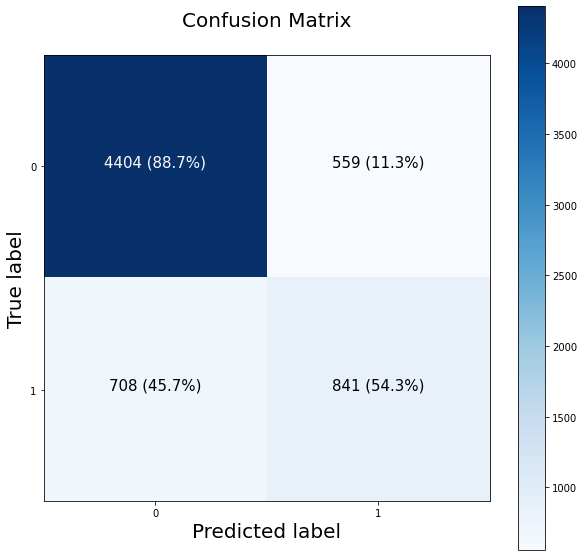

### Deploy model using FastAPI

https://www.geeksforgeeks.org/deploying-ml-models-as-api-using-fastapi/

https://testdriven.io/blog/fastapi-machine-learning/

https://towardsdatascience.com/how-to-build-and-deploy-a-machine-learning-model-with-fastapi-64c505213857



In [ ]:

#Using model to make prediction 
X_new=X_test[:10]
def prediction(X_new):
  
  y_proba=best_model_Bayesian_rs.predict(X_new)
  return tf.round(y_proba)[:10]

In [ ]:
prediction(X_new)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 1.],
       [-0.],
       [-0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 1.]], dtype=float32)>

In [ ]:
! pip install fastapi uvicorn

     |████████████████████████████████| 51kB 3.5MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 10.1MB 8.1MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [ ]:
# 1. Library imports
import uvicorn
from fastapi import FastAPI


# 2. Create the app object
app = FastAPI()


# 3. Index route, opens automatically on http://127.0.0.1:8000


# 4. Route with a single parameter, returns the parameter within a message
#    Located at: http://127.0.0.1:8000/AnyNameHere
@app.get('/predictoo')
def prediction(X_new):
  y_proba=best_model_Bayesian_rs.predict(X_new)
  return tf.round(y_proba)[:10]


/usr/local/lib/python3.7/dist-packages/fastapi/routing.py:550: RuntimeWarning: coroutine 'Server.serve' was never awaited
  def decorator(func: DecoratedCallable) -> DecoratedCallable:


In [ ]:

# 5. Run the API with uvicorn
#    Will run on http://127.0.0.1:8000
if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8090)

RuntimeError: ignored

In [ ]:
# Need to create model.py and app.py, call model in app.py